> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# Remove unnecessary columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis = 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Minimum value of budget, revenue, runtime, budget_adj and revenue_adj are 0. Based on the nature of the film, these 0 should be treated as a missing value.
##### Also, to make it more readable, I will change the scientific notation to normal float.

In [7]:
# Check datatype and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [8]:
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows.')

There are 16 columns and 10866 rows.


In [9]:
# count missing value
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### There are missing values.

In [10]:
# Check duplicated value
df.duplicated().sum()

1

##### There is one duplicated row.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Treat 0 as missing value in certain columns

In [11]:
cols = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[cols] = df[cols].replace({0:np.nan})

In [12]:
df.isna().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

##### Now there are much more missing values. To make the most of this dataset, I will drop missing value only for the nesesarry part of the analysis.

### Remove duplicated rows

In [13]:
# Check duplicated row
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [14]:
### delete duplicated
df.drop_duplicates(inplace = True)
df.shape

(10865, 16)

<a id='eda'></a>
## Exploratory Data Analysis
>What kinds of properties are associated with movies that have high vote average?

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does released year have any influence on the avarage vote?
> Is film quality changed? Does people give a easier judge to the old film? 
Also, given the fact that TMDb started in 2008, it might be possible that the old films especially before 2008 are not equally resistered in this website but only the big name filmes are registered.


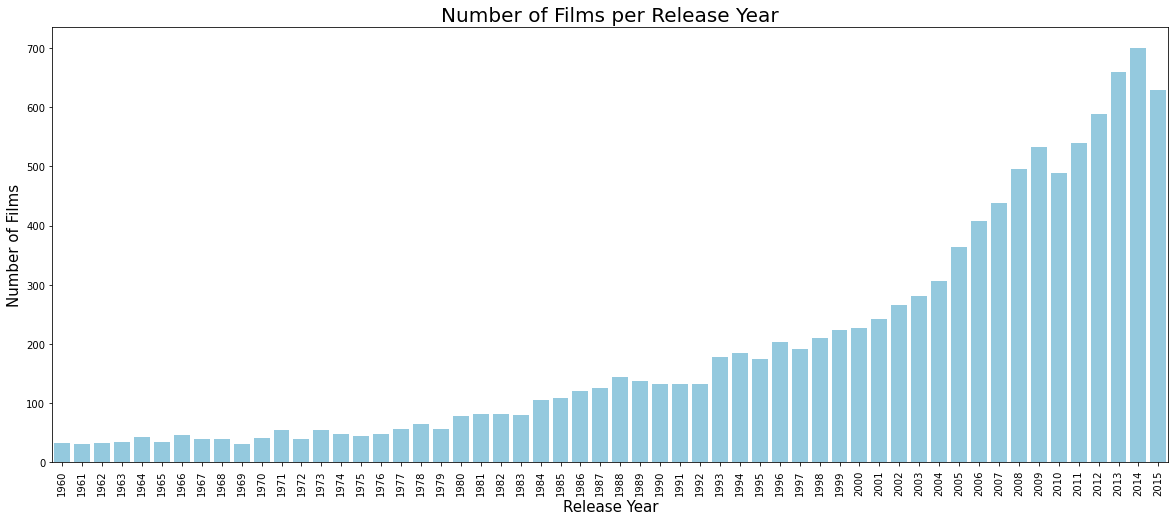

In [15]:
# Plot the number of films per realese year
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(data = df, x = 'release_year', color = 'skyblue')
ax.set_xlabel('Release Year', fontsize = 15)
ax.set_ylabel('Number of Films', fontsize = 15)
ax.set_title('Number of Films per Release Year', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

##### Overoll, the number of registered film is increasing. 

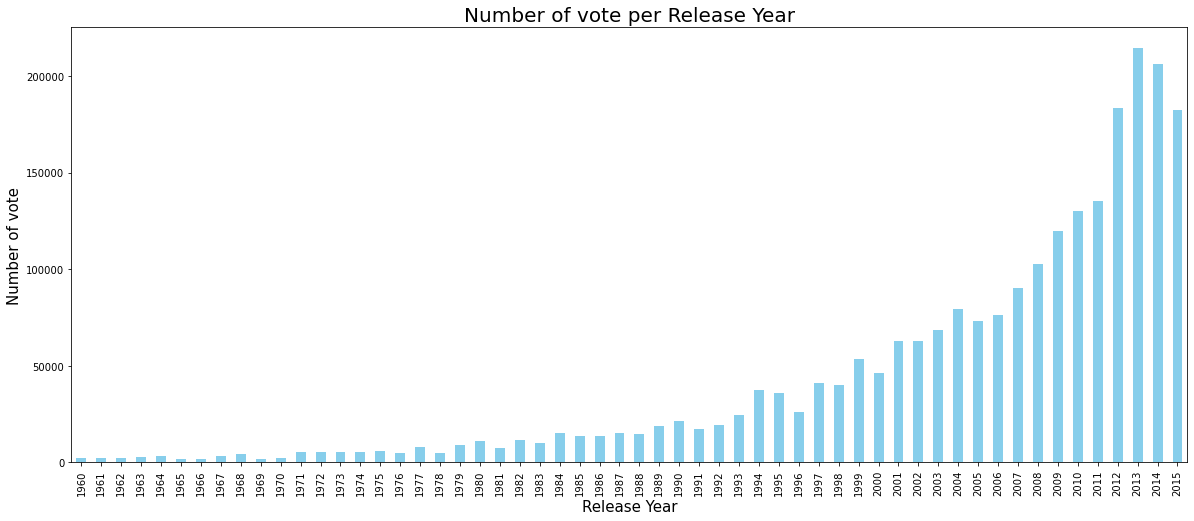

In [16]:
# Plot the number of vote per realese year
df.groupby('release_year').sum().vote_count.plot(kind='bar', figsize = (20,8), color = 'skyblue')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number of vote', fontsize = 15)
plt.title('Number of vote per Release Year', fontsize = 20);

##### The number of vote is also increasing.

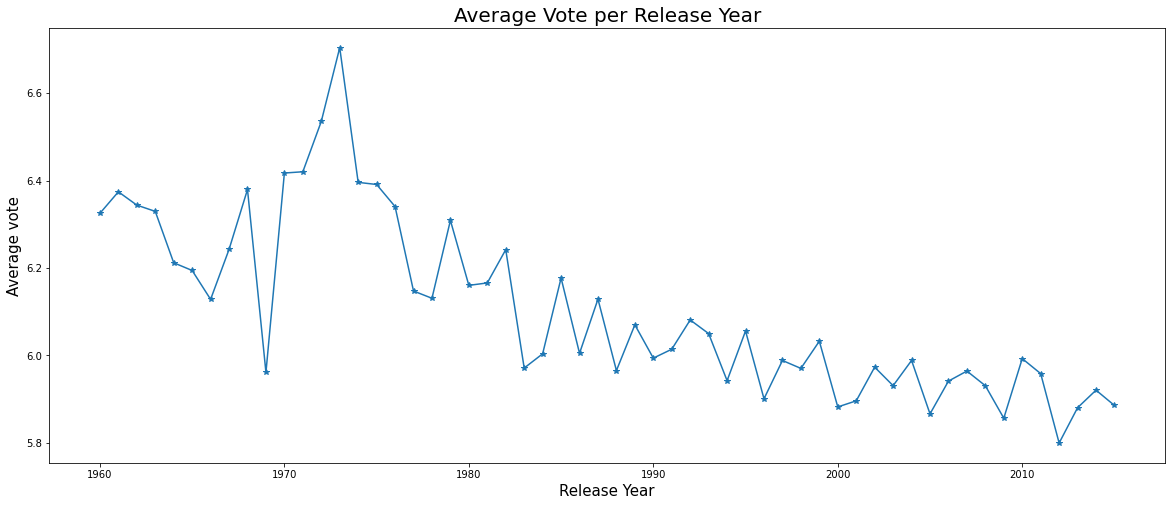

In [17]:
# Plot the avarae vote per realese year
df.groupby('release_year').mean().vote_average.plot(kind='line', figsize = (20,8), marker = '*')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Average vote', fontsize = 15)
plt.title('Average Vote per Release Year', fontsize = 20);

##### Overoll, vote avarage is slightly decreasing, while the number of the film and vote are increasing.

In [18]:
# Find the correlation coefficient
df_year_vote = df.groupby('release_year').sum().vote_count.to_frame(name = 'number_of_vote').reset_index()

In [19]:
df_year_title = df.groupby('release_year').count().original_title.to_frame(name = 'number_of_title').reset_index()

In [20]:
df_year_clean = df_year_vote.merge(df_year_title, how = 'inner')

In [21]:
df_year_avg = df.groupby('release_year').mean().vote_average.to_frame(name = 'average_vote').reset_index()

In [22]:
df_year_clean = df_year_clean.merge(df_year_avg, how = 'inner')

In [23]:
df_year_clean.corr()

,release_year,number_of_vote,number_of_title,average_vote
release_year,1.000000,0.828635,0.890582,-0.798732
number_of_vote,0.828635,1.000000,0.978191,-0.616217
number_of_title,0.890582,0.978191,1.000000,-0.682063
average_vote,-0.798732,-0.616217,-0.682063,1.000000


##### The number of vote and registered films are positively correlated. 
##### On the other hand, the avarage vote and the number of vote or films are negatively correlated.

### Does Genre have any influence on the vote avarage?

In [25]:
# Make a function to make one data per column by expanding rows
def expand(df, col):
    if type(col) != str:
        raise TypeError('col must be string')
    else:
        return df.drop(col, axis=1).join(df[col].str.split('|', expand = True).stack().rename(col).reset_index(drop = True))

In [27]:
df_genre = expand(df, 'genres')
df_genre.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [28]:
# Check unique values
df_genre['genres'].nunique()

20

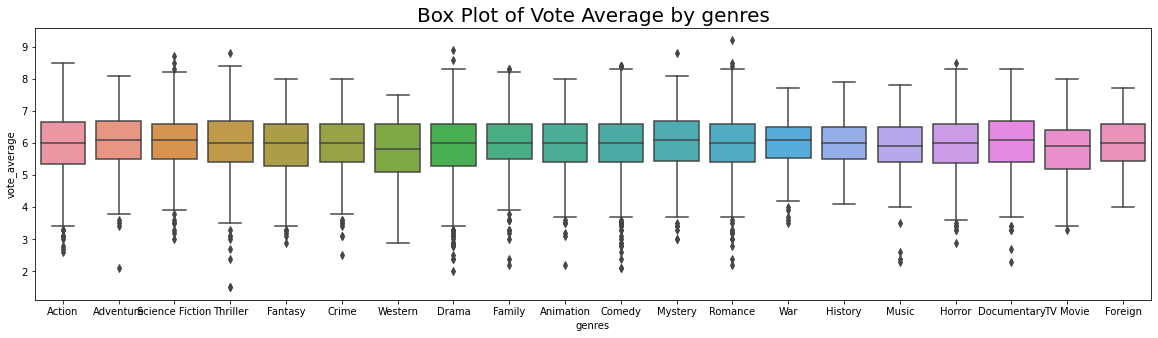

In [116]:
# Plot the vote avarage by genres
plt.figure(figsize=(20,5))
sns.boxplot(df_genre.genres, df_genre.vote_average)
plt.title('Box Plot of Vote Average by genres', fontsize = 20)
plt.savefig('boxplot2.png')
plt.show()

In [29]:
# Check descriptive statistics by Genre
df_genre.groupby('genres').mean().describe().vote_average

count    20.000000
mean      5.960122
std       0.081145
min       5.700000
25%       5.942717
50%       5.974169
75%       6.007238
max       6.068783
Name: vote_average, dtype: float64

##### The difference are relatively small.

### Do cast have any influence on the vote avarage?

In [30]:
# Make a new dataframe with one cast per row
df_cast = expand(df, 'cast')
df_cast.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Bryce Dallas Howard
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Irrfan Khan


In [31]:
# Check unique values
df_cast['cast'].nunique()

6433

In [32]:
# Find Check descriptive statistics of appearance by cast
df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False).original_title.describe()

count    6433.000000
mean        1.688948
std         1.524193
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: original_title, dtype: float64

##### 75% of the cast have apperances in less than 2 films.

In [ ]:
# Find Check descriptive statistics of appearance by cast
df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False).original_title.describe()

In [33]:
# Check the casts who appeared in more than 10 films
df_cast_count = df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False)

In [65]:
df_cast_count.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
cast,,,,,,,,,,,,,,,
Justin Long,14,6,7,14,14,13,14,14,12,14,14,14,14,6,7
Liam Neeson,14,7,8,14,14,13,14,14,12,14,14,14,14,7,8
James Franco,12,5,7,12,12,10,12,12,12,12,12,12,12,5,7
Samuel L. Jackson,12,4,4,12,12,10,12,12,10,12,12,12,12,4,4
Nicolas Cage,12,7,9,12,12,12,12,12,11,12,12,12,12,7,9


In [50]:
# Make a list of casts appeared in more than 10 films
cast_top = list(df_cast_count[df_cast_count['original_title'] >=10].index)
cast_top

['Justin Long',
 'Liam Neeson',
 'James Franco',
 'Samuel L. Jackson',
 'Nicolas Cage',
 'Kristen Wiig',
 'Sam Rockwell',
 'Brendan Gleeson',
 'Jessica Chastain',
 'Robert De Niro',
 'Bradley Cooper',
 'Alfred Molina',
 'Ben Kingsley',
 'James Marsden',
 'Danny Trejo',
 'Bill Nighy',
 'Jason Bateman',
 'Ron Perlman',
 'Jesse Eisenberg',
 'Seth Rogen',
 'Michael Fassbender',
 'Julianne Moore',
 'Sam Worthington',
 'Anna Kendrick',
 'Rosario Dawson',
 'Kristen Stewart',
 'Rachel McAdams',
 'Joseph Gordon-Levitt',
 'Danny Glover',
 'Colin Farrell',
 'Ray Liotta',
 'J.K. Simmons',
 'Amanda Seyfried',
 'ChloÃ« Grace Moretz',
 'Adrien Brody']

In [59]:
# Make a dataframe of film with casts appeared in more than 10 films
df_cast_top = df_cast[df_cast['cast'].isin(cast_top)].reset_index()

In [62]:
df_cast_top.head(3)

,index,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,34,3.644541,58000000.0,150170815.0,Goosebumps,Rob Letterman,based on novel|magic|fantasy|family|3d,103.0,Adventure|Horror|Comedy,Columbia Pictures|Original Film|Scholastic Ent...,8/5/15,600,6.2,2015,5.335998e+07,1.381571e+08,J.K. Simmons
1,36,3.358321,NaN,22354572.0,Solace,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,NaN,2.056620e+07,Jessica Chastain
2,37,3.339135,175000000.0,331926147.0,The Good Dinosaur,Peter Sohn,tyrannosaurus rex|friends|animation|alternate ...,93.0,Adventure|Animation|Comedy|Family|Fantasy,Walt Disney Pictures|Pixar Animation Studios|B...,11/14/15,1087,6.6,2015,1.609999e+08,3.053719e+08,Kristen Wiig


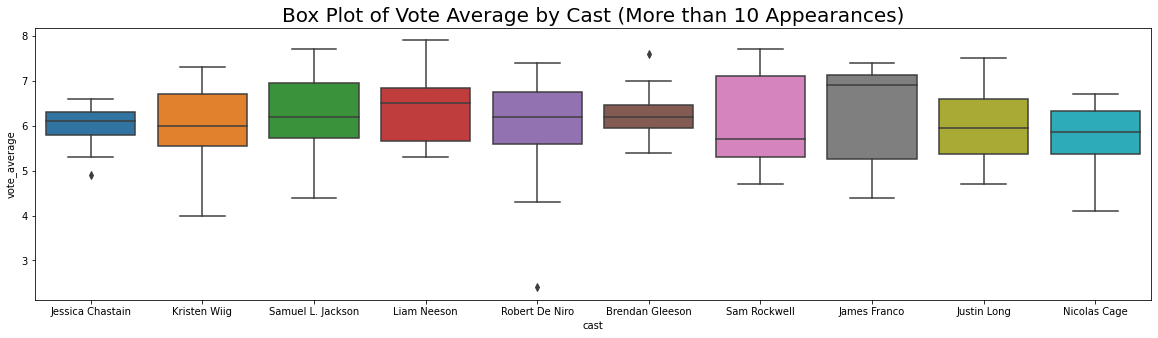

In [64]:
# Check descriptive statistics by Genre
df_genre.groupby('genres').mean().describe().vote_average

In [ ]:
# Check the casts top 10 appearance
df_cast_top = df_cast[df_cast['cast'].isin(cast_top)]

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!